# Solve for subtactive decoders

In [454]:
a_minus = vocab.parse("A-B-C-D-E-F-J")
b_minus = vocab.parse("B-A-C-D-E-F-J")

In [455]:
np.dot(a_minus.v, b_minus.v)

-1.0718498278930038

In [456]:
np.dot(vocab["A"].v, vocab["B"].v)

-0.20749909671786593

In [457]:
np.dot(vocab["A"].v, a_minus.v)

1.7568897595305542

In [458]:
np.dot(vocab["A"].v, vocab["A"].v)

1.0

In [459]:
solver = nengo.solvers.LstsqL2(reg=0.02)

In [460]:
with nengolib.Network(seed=seed) as model:
    ens = nengo.Ensemble(n_neurons, D, intercepts=intercepts)

with nengo.Simulator(model) as sim:
    pass

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

In [461]:
v_key_set

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [462]:
targets = []

v_key_set = set(vocab.keys())
v_key_list = list(vocab.keys())

for key in v_key_list:
    minus = " - ".join(v_key_set - set(key))
    targ_str = f"{key} - {minus}"
    print(targ_str)
    targets.append(vocab.parse(targ_str).v)

A - C - G - B - J - I - D - E - F - H
B - C - G - J - I - D - E - F - A - H
C - G - B - J - I - D - E - F - A - H
D - C - G - B - J - I - E - F - A - H
E - C - G - B - J - I - D - F - A - H
F - C - G - B - J - I - D - E - A - H
G - C - B - J - I - D - E - F - A - H
H - C - G - B - J - I - D - E - F - A
I - C - G - B - J - D - E - F - A - H
J - C - G - B - I - D - E - F - A - H


In [463]:
_, activities = tuning_curves(ens, sim, vocab.vectors)

In [464]:
rec_dec, rmse = solver(activities, targets)
rec_dec = rec_dec.T

In [473]:
vecs = vocab.vectors
feed = BasicVecFeed(list(vecs), list(vecs), t_present, D, len(vecs), t_pause)

with nengolib.Network(seed=seed) as test_model:
    in_nd = nengo.Node(feed.feed)
    output = nengo.Node(size_in=D)
    pause = nengo.Node(lambda t: feed.paused)
    
    ens = nengo.Ensemble(n_neurons, D, encoders=enc, intercepts=intercepts)

    nengo.Connection(in_nd, ens, synapse=None)
    nengo.Connection(pause, ens.neurons, transform=-10*np.ones((n_neurons, 1)), synapse=0.01)
    nengo.Connection(ens.neurons, output, transform=rec_dec/1000)

    p_in = nengo.Probe(in_nd)
    p_out = nengo.Probe(output, synapse=0.01)

with nengo.Simulator(test_model) as test_sim:
    test_sim.run(len(vecs)*t_each + t_pause)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

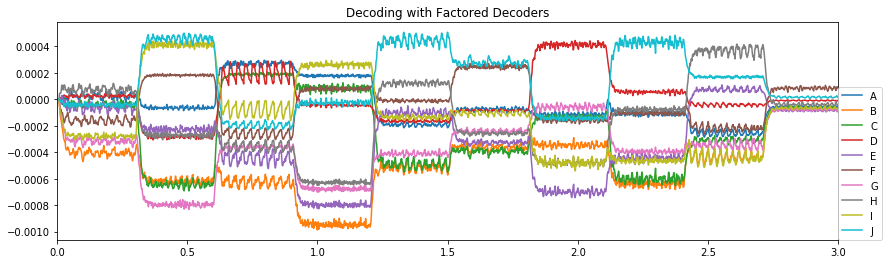

In [474]:
plt.figure(figsize=(14, 4))
plt.plot(test_sim.trange(), spa.similarity(test_sim.data[p_out], vocab))
plt.title("Decoding with Factored Decoders")
plt.xlim(test_sim.trange()[0], test_sim.trange()[-1])
plt.legend(vocab.keys(), loc=(1, 0));

Whelp, that didn't work at all.